In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

In [3]:
data ="""اسلام آباد: حکومت نے رواں ماہ اصولی طور پر 'کامیاب پاکستان پروگرام' متعارف کروانے کا فیصلہ کرلیا جس کے تحت 40 لاکھ گھرانوں کو متعدد اسکیمز کے تحت معاونت فراہم کی جائے گی۔

ڈان اخبار کی رپورٹ کے مطابق یہ پروگرام آئندہ انتخابات سے قبل حکومت کی جانب سے معاشرے کے غریب طبقے کے لیے اٹھائے گئے بڑے اقدامات میں سے ایک معلوم ہوتا ہے۔

ڈان سے گفتگو کرتے ہوئے وزیر خزانہ شوکت ترین نے کہا کہ 'ہم نے اس پروگرام کے ہر پہلو کو حتمی شکل دے دی ہے اور اسے جولائی کے وسط میں متعارف کروایا جائے گا'۔

یہ بھی پڑھیں: بجٹ 2022ء میں نوجوانوں کے لیے کیا ’خاص‘ ہے؟

پروگرام کے چند پہلوؤں سے آگاہ کرتے ہوئے انہوں نے بتایا کہ اس کا مقصد عوام کو رہائشی منصوبوں، ہنر کی تربیت، صحت کارڈ اور کاروبار اور زرعی کاموں کے لیے بلاسود قرضے فراہم کرنا ہے۔

تاہم ان کا کہنا تھا کہ اہداف ایک سال میں نہیں بلکہ وقت کے ساتھ ساتھ حاصل کیے جائیں گے۔

وفاقی وزیر نے کہا کہ مالی سال 22-2021 کے دوران تقریباً 3 کھرب سے 4 کھرب روپے کے بلاسود قرضے دیے جائیں گے اور کہا کہ بلاسود قرضوں کے لیے سبسڈی کی رقم مالی سال 22-2021 کے بجٹ میں مختص کی جاچکی ہے۔

انہوں نے بتایا کہ 'کامیاب جوان پروگرام' اس منصوبے کا ہی حصہ ہوگا۔

ٹیکس بیس کو بڑھانے کے بارے میں انہوں نے کہا کہ 72 لاکھ افراد کو ٹیکس نیٹ میں لانے کے لیے حکمت عملی تشکیل دی گئی ہے جسے جلد حتمی شکل دی جائے گی اور کسی ٹیکس دہندہ کو ہراساں نہیں کیا جائے گا۔

مزید پڑھیں: نوجوانوں کو روزگار کی فراہمی کیلئے 2 خصوصی پروگرامز شروع کیے ہیں، وزیراعظم

ان کا مزید کہنا تھا کہ رواں مالی سال میں پوائنٹ آف سیل پروگرام کو زیادہ سے زیادہ تاجروں تک پہنچایا جائے گا۔

دوسری جانب اقتصادری مشاورتی کونسل (ای اے سی) کے اجلاس میں وزیر خزانہ نے مستحکم اور مجموعی اقتصادی نمو کے حصول کے لیے طویل المدتی منصوبہ بندی پر زور دیا۔

انہوں نے کہا کہ وزیراعظم عمران خان نے دہائیوں کے بعد ای اے سی کی تشکیل نو کی ہے، جس کا مقصد تمام اسٹیک ہولڈرز سے مشاورت کر کے پائیدار معاشی نمو کے لیے ٹھوس تجاویز مرتب کرنا ہے۔

ای اے سی کے تیسرے اجلاس کے دوران 4 ذیلی گروپوں نے سرکاری انٹرپرائزز اور نجکاری، توانائی، مقامی تجارت اور ملک میں قیمتیں مستحکم رکھنے پر پریزینٹیشنز دیں۔

وزیراعظم کے معاون خصوصی برائے خزانہ و ریونیو ڈاکٹر وقار مسعود خان نے قیمتوں میں استحکام سے متعلق ایک تفصیلی جائزہ پیش کیا جس میں ملک میں قیمتیں مستحکم کرنے کے لیے قلیل مدتی، وسط مدتی اور طویل مدتی تجاویز شامل تھیں۔

یہ بھی پڑھیں: حکومت نے 'کامیاب جوان پروگرام' میں قرضوں کی حد ڈھائی کروڑ روپے تک بڑھا دی

انہوں نے موجودہ اور تاریخی تناظر میں پاکستان اور پورے خطے میں قیمتوں کے مابین تقابلی جائزہ پیش کیا۔ شامل کیا گیا۔

علاوہ ازیں زید بشیر نے 'ڈومیسٹک کامرس سیکٹر' کے بارے میں پریزنٹیشن دیتے ہوئے دستاویزی/ مربوط شعبوں کو تقویت دینے اور ان کی بحالی اور مختصر مدت کے دوران خوردہ فروشوں کو مزید منظم ماحول میں لاکر قومی خزانے میں شراکت میں اضافہ کرنے کے ذریعہ ای کامرس کی حقیقی صلاحیت کا پوری طرح سے ادراک کرنے کی نشاندہی کی۔

کمپنیوں کے اندراج پر ٹیکس کریڈٹ اور درمیانی مدت کے منصوبوں کے تحت خواتین کو ملازمت میں شامل کرنے کی حوصلہ افزائی جبکہ تجارتی شعبے کو فروغ دینے کے لئے طویل المدتی حکمت عملی کے تحت خوردہ فروشوں کی ترقی اور ٹیکس ایڈجسٹیبیلیٹی کے لیے تجاویز دی گئیں۔
"""


In [11]:
tokenizer= Tokenizer()
corpus =data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
# tokenizer.word_index
word_index = tokenizer.word_index
total_words = len(word_index)+1

In [21]:
# input_sequences=[]
# for line in corpus:
#     print(line)
#     token_list = tokenizer.texts_to_sequences([line])[0]
#     print(token_list)
#     for i in range(1,len(token_list)):
#         ngram_sequence = token_list[:i+1]
#         print(ngram_sequence)
#         input_sequences.append(ngram_sequence)
# #         print(token_list[:i+1])

In [24]:
# word_index[]

In [25]:
input_sequences=[]
for line in corpus:
    print(line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1,len(token_list)):
        ngram_sequence= token_list[:1+i]
        print(ngram_sequence)
        input_sequences.append(ngram_sequence)

اسلام آباد: حکومت نے رواں ماہ اصولی طور پر 'کامیاب پاکستان پروگرام' متعارف کروانے کا فیصلہ کرلیا جس کے تحت 40 لاکھ گھرانوں کو متعدد اسکیمز کے تحت معاونت فراہم کی جائے گی۔
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109, 27, 1, 17, 110, 50, 111, 6, 112, 113, 1, 17, 114, 51, 4, 11, 115]
[102, 103]
[102, 103, 24]
[102, 103, 24, 3]
[102, 103, 24, 3, 47]
[102, 103, 24, 3, 47, 104]
[102, 103, 24, 3, 47, 104, 105]
[102, 103, 24, 3, 47, 104, 105, 106]
[102, 103, 24, 3, 47, 104, 105, 106, 16]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108]
[102, 103, 24, 3, 47, 104, 105, 106, 16, 25, 48, 26, 49, 107, 10, 108, 109]
[102,

In [30]:
max_sequence_len = max([ len(input_) for input_ in input_sequences])

In [31]:
padded_input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))

In [40]:
# Getting element from 0 index to Second last element
padded_input_sequences[:,:-1]

array([[  0,   0,   0, ...,   0,   0, 102],
       [  0,   0,   0, ...,   0, 102, 103],
       [  0,   0,   0, ..., 102, 103,  24],
       ...,
       [  0,   0,   0, ..., 309,   1,   8],
       [  0,   0,   0, ...,   1,   8,  45],
       [  0,   0,   0, ...,   8,  45,  13]], dtype=int32)

In [41]:
# Last element 
padded_input_sequences[:,-1]

array([103,  24,   3,  47, 104, 105, 106,  16,  25,  48,  26,  49, 107,
        10, 108, 109,  27,   1,  17, 110,  50, 111,   6, 112, 113,   1,
        17, 114,  51,   4,  11, 115, 116,   4, 117,   1, 118,  28,  18,
       119, 120,   7, 121,  24,   4,  53,   7, 122,   1, 123, 124,   1,
         8, 125, 126, 127, 128,   2,   7,  29, 129, 130,  19,   7, 131,
        54,  30,  31,  32, 132, 133,   3,  12,   9, 134,   3,  33,  18,
         1, 135, 136,   6,  55,  56, 137,  13,  57,   5, 138, 139,   1,
        58,   2,  49, 140,  11, 141,  59,  34,  60, 142,   2,  61,   1,
         8,  20, 143, 144,   1, 145, 146,   7, 147,  54,  30,  14,   3,
        62,   9,  33,  10,  63, 148,   6, 149, 150, 151,   4, 152, 153,
       154,   5, 155,   5, 156, 157,   1,   8,  35,  64,  51,  65,  19,
        36,  10,  66,  67,   9, 159,  29,  21,   2,  68, 160, 161,   1,
        69,  69, 162,  70,  71, 163,  31,   3,  12,   9,  37,  21,  72,
        73,   1,  38, 165, 166,  74,   7,  75,  74,  76,   1,  3

In [44]:
xs = padded_input_sequences[:,:-1]
labels=padded_input_sequences[:,-1]


In [45]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # One hot encoding

In [46]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [48]:
# print(tokenizer.word_index)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

In [49]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20,return_sequences=True,)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
history=model.fit(xs,ys,epochs=1000,verbose=1)

Epoch 1/1000
18/18 [==============================] - 6s 39ms/step - loss: 5.7334 - accuracy: 0.0319
Epoch 2/1000
18/18 [==============================] - 1s 42ms/step - loss: 5.6507 - accuracy: 0.0679
Epoch 3/1000
18/18 [==============================] - 1s 36ms/step - loss: 5.4279 - accuracy: 0.0556
Epoch 4/1000
18/18 [==============================] - 1s 46ms/step - loss: 5.3433 - accuracy: 0.0493
Epoch 5/1000
18/18 [==============================] - 1s 46ms/step - loss: 5.2799 - accuracy: 0.0566
Epoch 6/1000
18/18 [==============================] - 1s 44ms/step - loss: 5.2962 - accuracy: 0.0607
Epoch 7/1000
18/18 [==============================] - 1s 47ms/step - loss: 5.1972 - accuracy: 0.0629
Epoch 8/1000
18/18 [==============================] - 1s 46ms/step - loss: 5.2286 - accuracy: 0.0576
Epoch 9/1000
18/18 [==============================] - 1s 43ms/step - loss: 5.2153 - accuracy: 0.0650
Epoch 10/1000
18/18 [==============================] - 1s 48ms/step - loss: 5.1941 - accura

18/18 [==============================] - 1s 46ms/step - loss: 2.2446 - accuracy: 0.4991
Epoch 161/1000
18/18 [==============================] - 1s 51ms/step - loss: 2.0988 - accuracy: 0.5547
Epoch 162/1000
18/18 [==============================] - 1s 50ms/step - loss: 2.1183 - accuracy: 0.5497
Epoch 163/1000
18/18 [==============================] - 1s 51ms/step - loss: 2.0533 - accuracy: 0.5678
Epoch 164/1000
18/18 [==============================] - 1s 64ms/step - loss: 2.0714 - accuracy: 0.5619
Epoch 165/1000
18/18 [==============================] - 1s 54ms/step - loss: 1.9901 - accuracy: 0.5726
Epoch 166/1000
18/18 [==============================] - 1s 59ms/step - loss: 2.0092 - accuracy: 0.5744
Epoch 167/1000
18/18 [==============================] - 1s 57ms/step - loss: 2.0043 - accuracy: 0.5883
Epoch 168/1000
18/18 [==============================] - 1s 53ms/step - loss: 2.0470 - accuracy: 0.5525
Epoch 169/1000
18/18 [==============================] - 1s 58ms/step - loss: 2.0411 - ac

18/18 [==============================] - 1s 71ms/step - loss: 0.8215 - accuracy: 0.8672
Epoch 319/1000
18/18 [==============================] - 1s 76ms/step - loss: 0.8230 - accuracy: 0.8648
Epoch 320/1000
18/18 [==============================] - 1s 74ms/step - loss: 0.8005 - accuracy: 0.8870
Epoch 321/1000
18/18 [==============================] - 1s 70ms/step - loss: 0.7774 - accuracy: 0.8762
Epoch 322/1000
18/18 [==============================] - 1s 69ms/step - loss: 0.8338 - accuracy: 0.8765
Epoch 323/1000
18/18 [==============================] - 1s 70ms/step - loss: 0.8342 - accuracy: 0.8674
Epoch 324/1000
18/18 [==============================] - 1s 73ms/step - loss: 0.8317 - accuracy: 0.8571
Epoch 325/1000
18/18 [==============================] - 1s 70ms/step - loss: 0.8460 - accuracy: 0.8548
Epoch 326/1000
18/18 [==============================] - 1s 62ms/step - loss: 0.8267 - accuracy: 0.8543
Epoch 327/1000
18/18 [==============================] - 1s 58ms/step - loss: 0.8617 - ac

18/18 [==============================] - 2s 118ms/step - loss: 0.5685 - accuracy: 0.8963
Epoch 477/1000
18/18 [==============================] - 2s 136ms/step - loss: 0.5448 - accuracy: 0.8812
Epoch 478/1000
18/18 [==============================] - 3s 153ms/step - loss: 0.5058 - accuracy: 0.9031
Epoch 479/1000
18/18 [==============================] - 2s 133ms/step - loss: 0.4649 - accuracy: 0.9165
Epoch 480/1000
18/18 [==============================] - 3s 158ms/step - loss: 0.5133 - accuracy: 0.8838
Epoch 481/1000
18/18 [==============================] - 2s 106ms/step - loss: 0.5101 - accuracy: 0.8924
Epoch 482/1000
18/18 [==============================] - 1s 69ms/step - loss: 0.4358 - accuracy: 0.9312
Epoch 483/1000
18/18 [==============================] - 1s 72ms/step - loss: 0.5078 - accuracy: 0.9112
Epoch 484/1000
18/18 [==============================] - 1s 82ms/step - loss: 0.4852 - accuracy: 0.9096
Epoch 485/1000
18/18 [==============================] - 1s 82ms/step - loss: 0.476

18/18 [==============================] - 1s 76ms/step - loss: 0.1664 - accuracy: 0.9679
Epoch 635/1000
18/18 [==============================] - 1s 73ms/step - loss: 0.2074 - accuracy: 0.9626
Epoch 636/1000
18/18 [==============================] - 1s 75ms/step - loss: 0.2239 - accuracy: 0.9552
Epoch 637/1000
18/18 [==============================] - 1s 76ms/step - loss: 0.2407 - accuracy: 0.9478
Epoch 638/1000
18/18 [==============================] - 1s 77ms/step - loss: 0.2652 - accuracy: 0.9453
Epoch 639/1000
18/18 [==============================] - 1s 73ms/step - loss: 0.3991 - accuracy: 0.9257
Epoch 640/1000
18/18 [==============================] - 1s 81ms/step - loss: 0.2981 - accuracy: 0.9336
Epoch 641/1000
18/18 [==============================] - 1s 73ms/step - loss: 0.2862 - accuracy: 0.9334
Epoch 642/1000
18/18 [==============================] - 1s 72ms/step - loss: 0.2240 - accuracy: 0.9565
Epoch 643/1000
18/18 [==============================] - 1s 78ms/step - loss: 0.1893 - ac

18/18 [==============================] - 2s 100ms/step - loss: 0.0958 - accuracy: 0.9907
Epoch 793/1000
18/18 [==============================] - 2s 97ms/step - loss: 0.0859 - accuracy: 0.9887
Epoch 794/1000
18/18 [==============================] - 2s 97ms/step - loss: 0.0884 - accuracy: 0.9892
Epoch 795/1000
18/18 [==============================] - 2s 98ms/step - loss: 0.0934 - accuracy: 0.9834
Epoch 796/1000
18/18 [==============================] - 2s 97ms/step - loss: 0.0914 - accuracy: 0.9887
Epoch 797/1000
18/18 [==============================] - 2s 100ms/step - loss: 0.0899 - accuracy: 0.9764
Epoch 798/1000
18/18 [==============================] - 2s 96ms/step - loss: 0.0794 - accuracy: 0.9920
Epoch 799/1000
18/18 [==============================] - 2s 102ms/step - loss: 0.0937 - accuracy: 0.9913
Epoch 800/1000
18/18 [==============================] - 2s 101ms/step - loss: 0.0894 - accuracy: 0.9879
Epoch 801/1000
18/18 [==============================] - 2s 96ms/step - loss: 0.0948 

18/18 [==============================] - 2s 98ms/step - loss: 0.0478 - accuracy: 0.9923
Epoch 951/1000
18/18 [==============================] - 2s 98ms/step - loss: 0.0876 - accuracy: 0.9772
Epoch 952/1000
18/18 [==============================] - 2s 98ms/step - loss: 0.1063 - accuracy: 0.9781
Epoch 953/1000
18/18 [==============================] - 2s 95ms/step - loss: 0.1514 - accuracy: 0.9608
Epoch 954/1000
18/18 [==============================] - 2s 96ms/step - loss: 0.3261 - accuracy: 0.9182
Epoch 955/1000
18/18 [==============================] - 2s 99ms/step - loss: 0.3562 - accuracy: 0.8962
Epoch 956/1000
18/18 [==============================] - 2s 98ms/step - loss: 0.4462 - accuracy: 0.8656
Epoch 957/1000
18/18 [==============================] - 2s 97ms/step - loss: 0.4353 - accuracy: 0.8646
Epoch 958/1000
18/18 [==============================] - 2s 95ms/step - loss: 0.2417 - accuracy: 0.9437
Epoch 959/1000
18/18 [==============================] - 2s 103ms/step - loss: 0.2256 - a

In [50]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

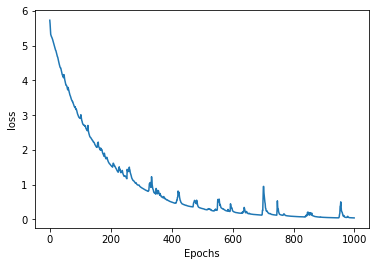

In [52]:
plot_graphs(history,"loss")

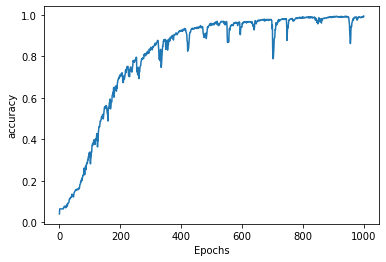

In [51]:
plot_graphs(history,"accuracy")

In [55]:
speed_text = "اپریل میں امید سے ہونے کی"
next_words = 100 # Ask to predict the next n words

In [57]:
tokenizer.texts_to_sequences([speed_text])

[[2, 7, 4]]

In [58]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequence([speed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1)
    predicted = model.predict_classes(token_list,verbose=1)
    print(predicted)
    for word,index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
        seed_text += " " + output_word
        print(seed_text)        

AttributeError: 'Tokenizer' object has no attribute 'texts_to_sequence'

In [ ]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],maxlen=max_sequence_len-1)
    predicted = model.predict_classes(token_list,verbose=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)